In [44]:
import numpy as np
import pandas as pd
import re
import string
import nltk

dataset link: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [45]:
data=pd.read_csv('IMDB Dataset.csv'); data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Taking the first 5000 instances because otherwise system crashing


In [46]:
data=data.iloc[0:5000,:];data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
4995,An interesting slasher film with multiple susp...,negative
4996,i watched this series when it first came out i...,positive
4997,Once again Jet Li brings his charismatic prese...,positive
4998,"I rented this movie, after hearing Chris Gore ...",negative


In [47]:
data['review']

0       One of the other reviewers has mentioned that ...
1       A wonderful little production. <br /><br />The...
2       I thought this was a wonderful way to spend ti...
3       Basically there's a family where a little boy ...
4       Petter Mattei's "Love in the Time of Money" is...
                              ...                        
4995    An interesting slasher film with multiple susp...
4996    i watched this series when it first came out i...
4997    Once again Jet Li brings his charismatic prese...
4998    I rented this movie, after hearing Chris Gore ...
4999    This was a big disappointment for me. I think ...
Name: review, Length: 5000, dtype: object

# Data Preprocessing

In [48]:
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
all_stopwords = stopwords.words('english')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [49]:
for i in range(len(data['review'])):
  text=data['review'][i]
  text=text.lower()
  text = re.sub(r'[^\w\s]','',text)
  text=text.replace('br','')
  text=  ''.join((x for x in text if not x.isdigit()))
  text=text.split()
  text = [word for word in text if not word in all_stopwords]
  data['review'][i]=text

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [50]:
data['review']

0       [one, reviewers, mentioned, watching, oz, epis...
1       [wonderful, little, production, filming, techn...
2       [thought, wonderful, way, spend, time, hot, su...
3       [basically, theres, family, little, boy, jake,...
4       [petter, matteis, love, time, money, visually,...
                              ...                        
4995    [interesting, slasher, film, multiple, suspect...
4996    [watched, series, first, came, si, years, old,...
4997    [jet, li, ings, charismatic, presence, movie, ...
4998    [rented, movie, hearing, chris, gore, saying, ...
4999    [big, disappointment, think, worst, mastroiann...
Name: review, Length: 5000, dtype: object

# making the vocabulary

In [51]:
y=[]
for i in range(len(data['review'])):
  y.extend(data['review'][i])
print(len(y))
y=list(set(y))
print(len(y))

594842
47212


# Making the bag of words model

In [52]:
index_word={}
i=0
for word in y:
  index_word[word]=i
  i+=1

from collections import defaultdict

def bag_of_words(sent):
    count_dict = defaultdict(int)
    vec = np.zeros(len(y))
    for item in sent:
        count_dict[item] += 1
    for key,item in count_dict.items():
        vec[index_word[key]] = item
    return vec  

In [53]:
wordvec=[]
for sent in data['review']:
  wordvec.append(bag_of_words(sent))


In [54]:
x=np.array(wordvec)

# Classification

In [55]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [56]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['sentiment']= label_encoder.fit_transform(data['sentiment'])
data['sentiment']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0       1
1       1
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    0
4999    0
Name: sentiment, Length: 5000, dtype: int64

In [57]:
y=np.array(data['sentiment'])

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn_train=knn.predict(x_train)
metrics.accuracy_score(y_train,pred_knn_train)

0.74475

In [61]:
pred_knn_test=knn.predict(x_test)
metrics.accuracy_score(y_test,pred_knn_test)

0.611

In [62]:
acc=[]
k=[]
acc1=[]
for i in range(3,20):
  k.append(i)
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_knn_train=knn.predict(x_train)
  pred_knn_test=knn.predict(x_test)
  acc1.append(metrics.accuracy_score(y_test,pred_knn_test))
  acc.append(metrics.accuracy_score(y_train,pred_knn_train))


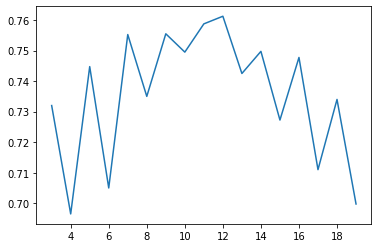

In [63]:
import matplotlib.pyplot as plt
plt.plot(k,acc)

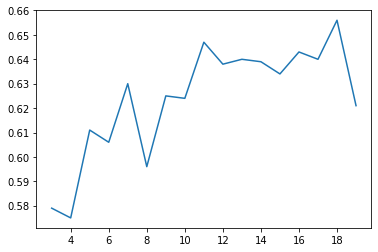

In [64]:
plt.plot(k,acc1)

# SVM

In [66]:
from sklearn.svm import SVC
svclassifier = SVC()
svclassifier.fit(x_train, y_train)
print(metrics.accuracy_score(y_train,svclassifier.predict(x_train)))
print(metrics.accuracy_score(y_test,svclassifier.predict(x_test)))

0.9775
0.843


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestClassifier as rfc
f=rfc(n_estimators = 100, random_state=0)
f.fit(x_train, y_train)
print(metrics.accuracy_score(y_test,f.predict(x_test)))

0.819
